In [105]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/AppleGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='AppleGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')

import seaborn as sns

In [106]:
# IQR 방법으로 아웃라이어 처리 -> 불량 삭제 => 하지마!

def outlier_remove_iqr(data, column, threshold=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    
    lower = q1 - (threshold * iqr)
    upper = q3 + (threshold * iqr)

    data.loc[(data[column] > upper) | (data[column] < lower), column] = np.nan
    return data[column]

In [107]:
food = pd.read_csv('data/food_defect_data.csv')
food

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L046,C,야간,O2,24.4,42.4,NaN,0,양품
1,L003,A,주간,O8,26.4,42.9,99.92,0,양품
2,L029,B,주간,O2,24.3,57.7,101.77,0,양품
3,L035,A,주간,O4,23.5,44.3,99.82,0,양품
4,L039,C,주간,O3,24.4,38.2,100.60,0,양품
...,...,...,...,...,...,...,...,...,...
495,L046,A,야간,O2,23.1,58.1,100.69,0,양품
496,L013,A,주간,O9,25.5,53.0,99.55,0,양품
497,L027,A,주간,O5,24.2,46.3,100.86,0,양품
498,L047,C,야간,O5,24.0,50.7,98.69,0,양품


In [108]:
grr = pd.read_csv('data/gage_rr_sample.csv')
grr

,Part,Operator,Trial,Weight
0,P1,O1,1,100.26
1,P1,O1,2,100.26
2,P1,O2,1,100.30
3,P1,O2,2,99.87
4,P1,O3,1,99.80
5,P1,O3,2,100.04
6,P2,O1,1,99.83
7,P2,O1,2,100.09
8,P2,O2,1,99.75
9,P2,O2,2,99.65


In [109]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lot_ID       500 non-null    object 
 1   Line         500 non-null    object 
 2   Shift        500 non-null    object 
 3   Operator     500 non-null    object 
 4   Temp         475 non-null    float64
 5   Humidity     475 non-null    float64
 6   Weight       475 non-null    float64
 7   Defect       500 non-null    int64  
 8   Defect_Type  500 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 35.3+ KB


In [110]:
grr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Part      60 non-null     object 
 1   Operator  60 non-null     object 
 2   Trial     60 non-null     int64  
 3   Weight    60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


<Axes: ylabel='Weight'>

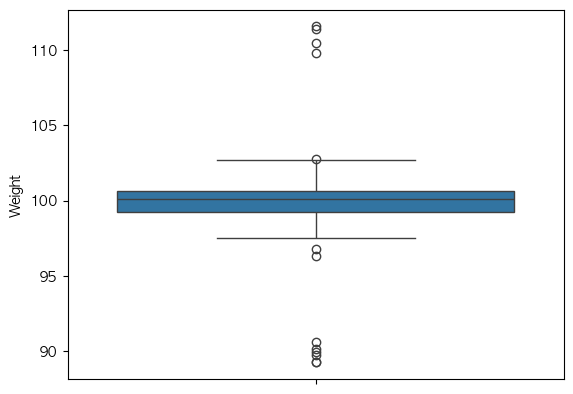

In [111]:
sns.boxplot(y=food['Weight'])

In [112]:
# # iqr 방법으로 아웃라이어 처리 -> 불량 또한 삭제 => 하지마!

numeric_columns = food.select_dtypes(include='number').columns
food["Weight"] = outlier_remove_iqr(food, "Weight", threshold=1.5)

In [113]:
# 결측치 제거

food = food.dropna()
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 1 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lot_ID       415 non-null    object 
 1   Line         415 non-null    object 
 2   Shift        415 non-null    object 
 3   Operator     415 non-null    object 
 4   Temp         415 non-null    float64
 5   Humidity     415 non-null    float64
 6   Weight       415 non-null    float64
 7   Defect       415 non-null    int64  
 8   Defect_Type  415 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 32.4+ KB


<Axes: ylabel='Weight'>

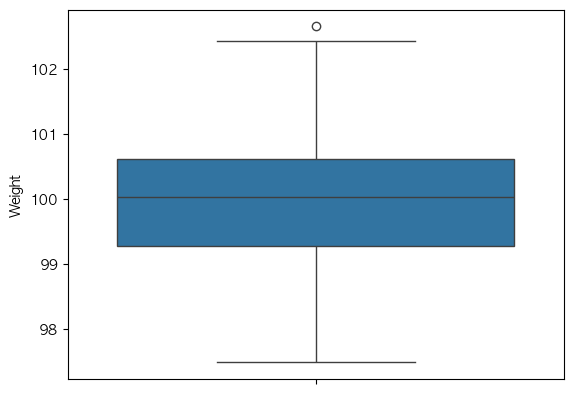

In [114]:
sns.boxplot(y=food['Weight'])

<Axes: ylabel='Humidity'>

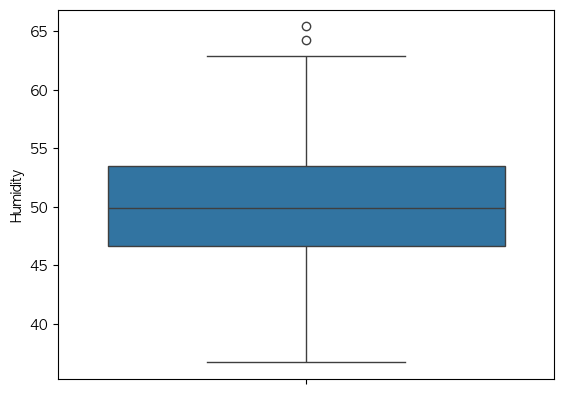

In [115]:
sns.boxplot(y=food['Humidity'])

<Axes: ylabel='Temp'>

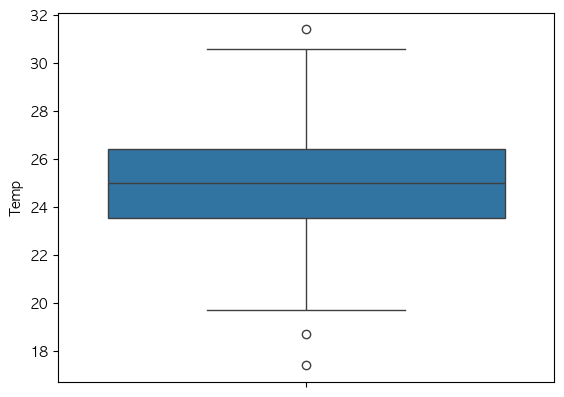

In [116]:
sns.boxplot(y=food['Temp'])

In [118]:
# # 파일 저장
# food.to_csv('data/food_clean.csv', index=False)
food.to_csv('data/food_clean+remove_outlier.csv', index=False)

In [119]:
food

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
1,L003,A,주간,O8,26.4,42.9,99.92,0,양품
2,L029,B,주간,O2,24.3,57.7,101.77,0,양품
3,L035,A,주간,O4,23.5,44.3,99.82,0,양품
4,L039,C,주간,O3,24.4,38.2,100.60,0,양품
5,L018,A,야간,O9,26.5,44.4,99.76,0,양품
...,...,...,...,...,...,...,...,...,...
495,L046,A,야간,O2,23.1,58.1,100.69,0,양품
496,L013,A,주간,O9,25.5,53.0,99.55,0,양품
497,L027,A,주간,O5,24.2,46.3,100.86,0,양품
498,L047,C,야간,O5,24.0,50.7,98.69,0,양품
